## CNN_Test_1

In [1]:
##Q1

## B. Extract spatial features

In [2]:
## Q2

## B Reduce computation by Downsampling

In [3]:
## Q3

## B ReLU

In [4]:
## Q4

## C. The step size while sliding the filter

In [5]:
## Q5

## B. Preserve spatial dimensions of the input

In [6]:
## Q6

## C. Increases

In [7]:
## Q7

## D. Recurrent layer

In [8]:
## Q8

## B. Max pooling

In [9]:
## Q9

## A. filter used to extract features from an image

In [10]:
## Q10

## D. All of the above

In [11]:
## Q11

## C. 227x227

In [12]:
## Q12

## B. 5

In [13]:
## Q13

## A. To make training faster

In [14]:
## Q14

## A. SGD with momentum

In [15]:
## Q15

## A. Dropout

In [16]:
## Q16

## A. Very deep networks with small convolutional filters

In [17]:
## Q17

## C. 3x3

In [18]:
## Q18

## D. VGG19

In [19]:
## Q19

## B. High computational and memory requirements

In [20]:
## Q20

## C. Same padding

Question:
Design and implement a Convolutional Neural Network (CNN) model to classify images into three categories: cats, dogs, and snakes, using the provided dataset. Ensure the following:
Dataset Download Link

In [ ]:
## First Unzip the zip file

In [6]:
import zipfile

zip_path = r'C:\\Users\\Dell\\Desktop\\AI&ML internship\\New folder\\CNN dataset.zip'
extract_to = r'C:\\Users\\Dell\\Desktop\\AI&ML internship\\New folder\\CNN dataset'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Dataset unzipped successfully.")

Dataset unzipped successfully.


In [ ]:
## Then write a path to your image dataset file

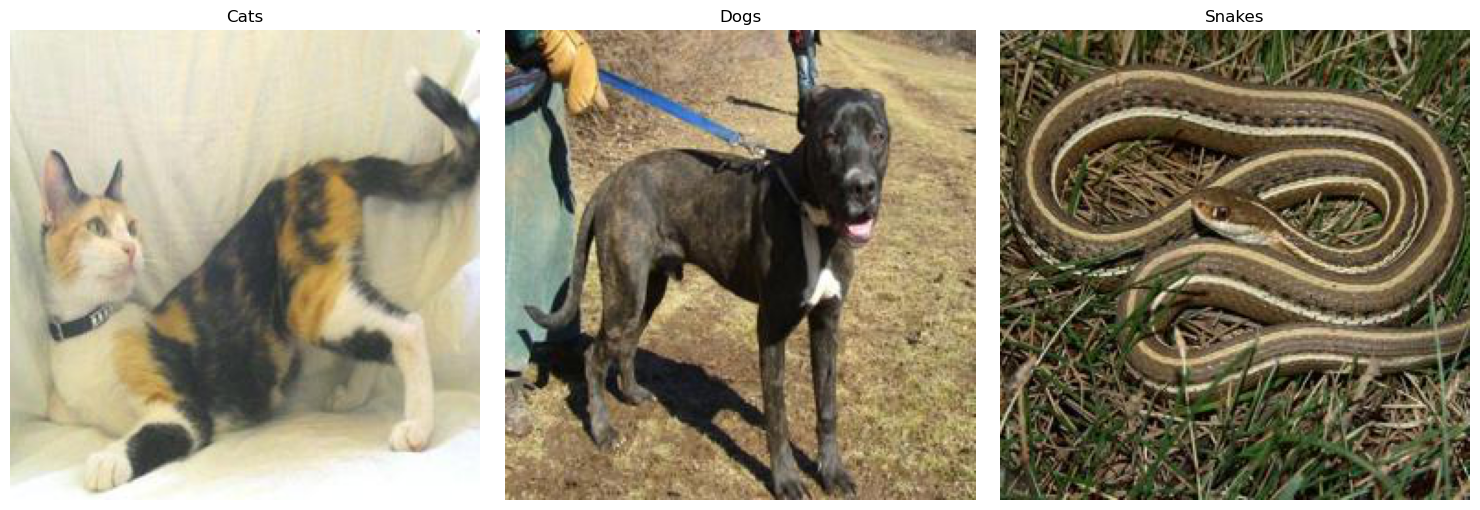

In [7]:
import matplotlib.pyplot as plt
import os
import random
from PIL import Image

# Path to your dataset
dataset_path = r'C:\Users\Dell\Desktop\AI&ML internship\New folder\CNN dataset\Animals'

# Subdirectories for cats, dogs, and snakes
categories = ["cats", "dogs", "snakes"]

# Get random image paths for each category
category_images = {}
for category in categories:
    category_path = os.path.join(dataset_path, category)
    if not os.path.exists(category_path):
        raise ValueError(f"Path does not exist: {category_path}")

    images = [os.path.join(category_path, file) for file in os.listdir(category_path) 
              if file.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))]
    
    if len(images) == 0:
        raise ValueError(f"No image files found in the category path: {category_path}")

    category_images[category] = random.choice(images)

# Plot the images
plt.figure(figsize=(15, 5))
for i, (category, image_path) in enumerate(category_images.items()):
    img = Image.open(image_path)
    plt.subplot(1, 3, i + 1)
    plt.imshow(img)
    plt.title(category.capitalize())
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
## Then next step is to Image resizing images, creating training and validating generator 

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os

# Path to the dataset directory
dataset_path = r"C:\\Users\\Dell\\Desktop\\AI&ML internship\\New folder\\CNN dataset\\Animals"  # Replace with your dataset path

# Parameters
image_size = (224, 224)  # Resize images to 224x224
batch_size = 32         # Batch size for training

# Step 1: Data Augmentation and Normalization
datagen = ImageDataGenerator(
    rescale=1./255,         # Normalize pixel values to [0, 1]
    rotation_range=30,      # Rotate images randomly by 30 degrees
    width_shift_range=0.2,  # Horizontal shift
    height_shift_range=0.2, # Vertical shift
    zoom_range=0.2,         # Random zoom
    horizontal_flip=True,   # Random horizontal flipping
    validation_split=0.2    # Reserve 20% for validation
)

# Step 2: Create Training and Validation Generators
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",  # Use categorical for multi-class labels
    subset="training"
)

validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation"
)

# Step 3: Verify the Class Indices (One-Hot Encoding)
print(f"Class indices: {train_generator.class_indices}")

# Step 4: Access a Batch of Preprocessed Images and Labels
images, labels = next(train_generator)
print(f"Image batch shape: {images.shape}")
print(f"Label batch shape: {labels.shape}")

Found 331 images belonging to 3 classes.
Found 81 images belonging to 3 classes.
Class indices: {'cats': 0, 'dogs': 1, 'snakes': 2}
Image batch shape: (32, 224, 224, 3)
Label batch shape: (32, 3)


In [ ]:
## Then we need to preprocess the dataset

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load and preprocess dataset manually
images, labels = [], []
classes = os.listdir(dataset_path)

for label, class_name in enumerate(classes):
    class_path = os.path.join(dataset_path, class_name)
    for image_file in os.listdir(class_path):
        img_path = os.path.join(class_path, image_file)
        img = load_img(img_path, target_size=image_size)  # Resize
        img_array = img_to_array(img) / 255.0            # Normalize
        images.append(img_array)
        labels.append(label)

# Convert to numpy arrays
images = np.array(images)
labels = np.array(labels)

# One-hot encode labels
labels = to_categorical(labels, num_classes=len(classes))

# Split into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

print(f"Training data shape: {x_train.shape}, {y_train.shape}")
print(f"Validation data shape: {x_val.shape}, {y_val.shape}")

Training data shape: (329, 224, 224, 3), (329, 3)
Validation data shape: (83, 224, 224, 3), (83, 3)


In [ ]:
## Now we actually start building core Deep learning Model

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Initialize the CNN model
model = Sequential()

# Input layer (implicitly included in the first Conv2D layer)

# Convolutional Layer 1 + Max Pooling
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 2 + Max Pooling
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 3
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))

# Flatten the output from convolutional layers
model.add(Flatten())

# Fully Connected Layer 1
model.add(Dense(units=128, activation='relu'))

# Fully Connected Layer 2
model.add(Dense(units=64, activation='relu'))

# Output Layer
model.add(Dense(units=3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 346112)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │      44,302,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,404,163 (169.39 MB)

 Trainable params: 44,404,163 (169.39 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
## Then after building the model We need to train and evaluate the model and take out its loss and accuracies

In [11]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Set the optimizer and learning rate
optimizer = Adam(learning_rate=0.001)

# Compile the model
model.compile(optimizer=optimizer, 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=16,  # Train for 15-20 epochs
    batch_size=32,  # Batch size of 32
    callbacks=[early_stopping]
)

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(x_val, y_val)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

Epoch 1/16
11/11 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.3254 - loss: 1.8063 - val_accuracy: 0.3494 - val_loss: 1.0993
Epoch 2/16
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.4149 - loss: 1.0415 - val_accuracy: 0.3373 - val_loss: 1.2060
Epoch 3/16
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.4713 - loss: 0.9965 - val_accuracy: 0.3976 - val_loss: 1.1201
Epoch 4/16
11/11 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.5796 - loss: 0.8953 - val_accuracy: 0.4578 - val_loss: 1.0266
Epoch 5/16
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.7207 - loss: 0.6870 - val_accuracy: 0.5060 - val_loss: 1.2364
Epoch 6/16
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.7497 - loss: 0.5305 - val_accuracy: 0.5663 - val_loss: 1.0091
Epoch 7/16
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.8937 - loss: 0.3478 - val_accuracy: 0.5301 - val_loss: 1.3075
Epoch 8/16
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.9275 - loss: 0.2108 - val_accuracy: 0.5663 - val_loss: